**MNIST Handwritten Digit Classification using Deep Learning(Neural Network)**

Importing the Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


Loading the MNIST data from keras.datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# Shape of the numpy arrays
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension   --> 28 * 28

Grayscale Image   --> 1 channel

In [ ]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


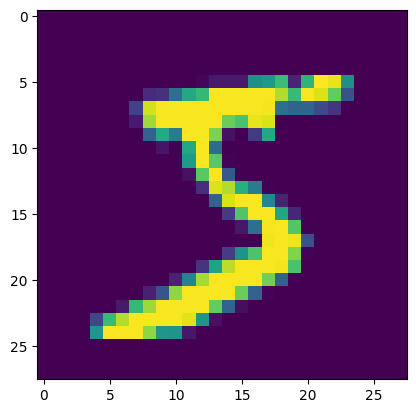

5


In [ ]:
# displaying the image

plt.imshow(X_train[0])
plt.show()

# print the corresponding label
print(Y_train[0])

Image Labels

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimension in this dataset. If not, we have to resize all the images to a common dimension

In [ ]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [ ]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [ ]:
# setting up tha layers of the Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
# compiling the network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8491 - loss: 0.5096
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9583 - loss: 0.1412
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9694 - loss: 0.1014
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9765 - loss: 0.0780
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9804 - loss: 0.0631
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9851 - loss: 0.0519
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9868 - loss: 0.0436
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9893 - loss: 0.0361
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9905 - loss: 0.0310
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9909 - loss: 0.0299


Training data accuracy = 99.09%

**Accuracy on Test data:**

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1336
0.9677000045776367


Test data accuracy = 96.77%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


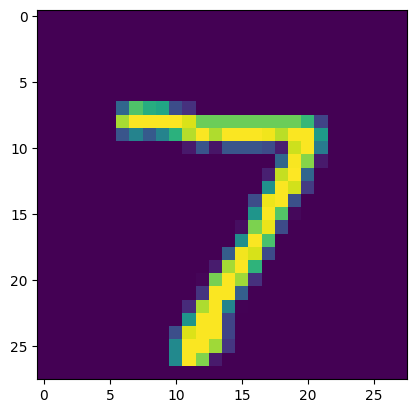

In [ ]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[2.0112902e-08 4.8248339e-08 6.2768446e-10 1.5613236e-04 3.9899288e-09
 1.9330662e-06 4.1696141e-13 9.9280512e-01 4.2847287e-08 7.0366492e-03]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
# converting the prediction probabilities to class label

label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [ ]:
# converting the prediction probabilities to class label for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)



[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(5), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [ ]:
print(Y_pred)

[[2.01129016e-08 4.82483387e-08 6.27684460e-10 ... 9.92805123e-01
  4.28472866e-08 7.03664916e-03]
 [5.36930778e-10 1.61092757e-08 9.99999940e-01 ... 4.61141438e-21
  6.85236257e-10 3.36686743e-20]
 [6.17631315e-08 9.99915183e-01 1.27463145e-05 ... 5.47552008e-05
  8.20397599e-06 7.85769373e-07]
 ...
 [1.84643980e-13 2.07893232e-13 6.08810203e-13 ... 1.37745981e-09
  7.05238534e-10 4.26351470e-08]
 [1.55497435e-16 1.94358096e-14 3.29752643e-22 ... 1.17849131e-13
  1.48529065e-08 3.71344021e-14]
 [9.89229383e-14 2.76710904e-15 1.10377399e-16 ... 1.19823005e-18
  6.09767431e-14 2.29314892e-14]]


Y_test  --> True labels

Y_pred_label  --> Predicted Labels

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 947    0    2    1    1    3    4    2    3   17]
 [   0 1120    2    3    0    1    3    3    3    0]
 [   2    1  996   14    3    0    3    7    6    0]
 [   0    0    3  987    0    4    0    4    3    9]
 [   0    1    4    1  959    1    4    1    0   11]
 [   2    1    0   22    1  854    3    0    2    7]
 [   5    2    2    1    6    9  929    1    2    1]
 [   1    1    6    4    1    0    0  992    0   23]
 [   1    1    5   23   10    5    0    3  912   14]
 [   0    2    0    3   16    2    0    4    1  981]], shape=(10, 10), dtype=int32)


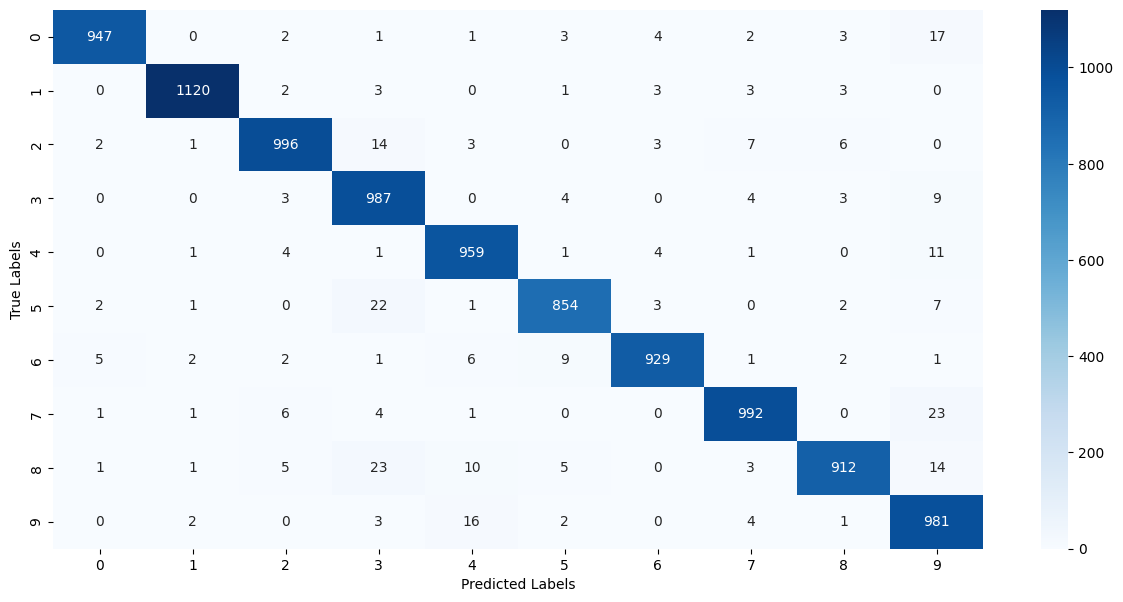

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

**Predictive System**

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as', input_pred_label)